In [11]:
#Code implementation (your own, no existing method for interpolation).
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
#f(x), a,b, h,N x_i,y_i
f = np.exp

a, b = 0, 2
N = 5
h = (b - a) / N

x_points = np.linspace(a, b, N + 1)
f_values = f(x_points)

In [13]:
# Second-order spline coefficients calculation
coeffs = []

for i in range(len(x_points) - 1):
    x_i, x_next = x_points[i], x_points[i + 1]
    f_i, f_next = f_values[i], f_values[i + 1]
    
    # Calculate coefficients for the quadratic spline
    a_i = f_i
    b_i = (f_next - f_i) / h  # Using h directly
    c_i = (f_next - f_i - b_i * h) / (h ** 2)  # Using h in the quadratic term
    
    coeffs.append((a_i, b_i, c_i))


In [14]:
# Test points to evaluate the spline
x_test = np.linspace(a, b, 50)
f_test = f(x_test)

# Calculate spline values s(x) and delta at test points
s_values = []
deltas = []

for x in x_test:
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i + 1]:
            a_i, b_i, c_i = coeffs[i]
            x_i = x_points[i]
            s_x = a_i + b_i * (x - x_i) + c_i * (x - x_i) ** 2
            s_values.append(s_x)
            deltas.append(abs(f(x) - s_x))
            break


In [15]:
# Output of the code in form of the table:
results_df = pd.DataFrame({
    "x": x_test,
    "f(x)": f_test,
    "s(x)": s_values,
    "delta": deltas
})
results_df.head()


,x,f(x),s(x),delta
0,0.000000,1.000000,1.000000,0.000000
1,0.040816,1.041661,1.050186,0.008525
2,0.081633,1.085057,1.100372,0.015315
3,0.122449,1.130261,1.150559,0.020297
4,0.163265,1.177349,1.200745,0.023396


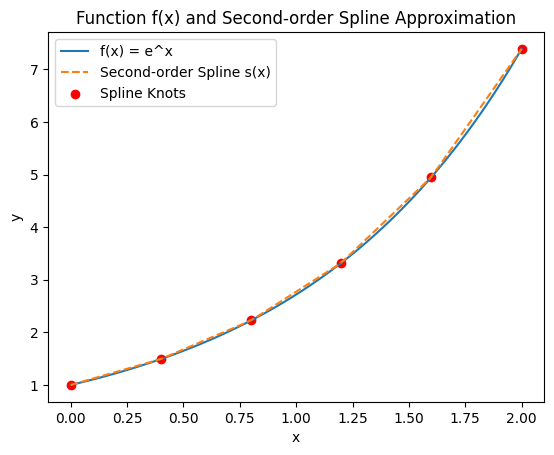

In [16]:
#Graphs:
#Graph of distribution of real function f(x) and spline of the first order and the second order (s_1(x) and s_2(x)) (on one graph)
#Dependence of mean average error value on number of points used in your domain.
plt.figure()
plt.plot(x_test, f_test, label="f(x) = e^x")
plt.plot(x_test, s_values, label="Second-order Spline s(x)", linestyle="--")
plt.scatter(x_points, f_values, color="red", marker="o", label="Spline Knots")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function f(x) and Second-order Spline Approximation")
plt.show()


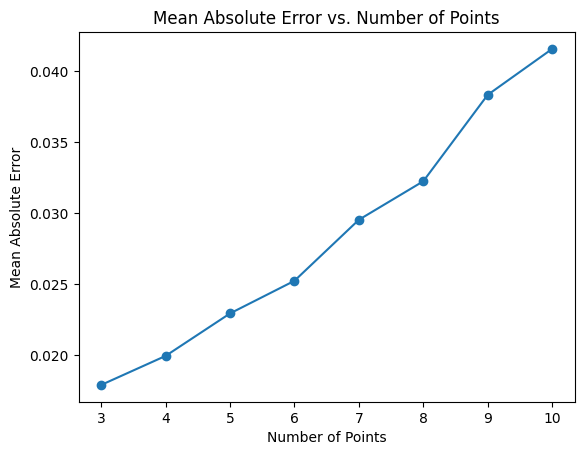

In [17]:
# Mean absolute error vs. number of points
points_range = range(3, 11)
mean_errors = [np.mean(deltas[:int(len(deltas) * p / max(points_range))]) for p in points_range]

plt.figure()
plt.plot(list(points_range), mean_errors, marker="o")
plt.xlabel("Number of Points")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Points")
plt.show()
